## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Three
# Solution of the linear, Gaussian inverse problem, Viewpoint 1: The length method

### 3.1 The lengths estimates

The simplest of methods for solving the linear inverse problem **Gm=d** is based on measures of the size, or length, of the estimated model parameters $\mathbf{m}^{\text{est}}$ and of the predicted data $\mathbf{d}^{\text{pre}}=\mathbf{Gm}^{\text{est}}$.  

To see that measures of length can be relevant to the solution of inverse problems, consider the simple problem of fitting a straight line to data.  This problem is often solved by the so-called method of least squares.  In this method, one tries to pick the model parameters (intercept and slope) so that the predicted data are as close as possible to the observed data.  For each observation, one defines a prediction error, or misfit, $e_i=d_i^{\text{obs}}-d_i^{\text{pre}}$.  The best-fit line is then the one with model parameters that lead to the smallest overall error *E*, defined as  

\begin{equation*}
E = \sum_{i=1}^N e_i^2 = \mathbf{e}^{\text{T}} \mathbf{e}
\end{equation*}  

The total error *E* (the sum of the squares of the individual errors) is exactly the squared Euclidean length of the vector **e**, or $E = \mathbf{e}^{\text{T}} \mathbf{e}$.  

The method of least squares estimates the solution of an inverse problem by finding the model parameters that minimize a particular measure of the length of the prediction error, $\mathbf{e} = \mathbf{d}^{\text{obs}}-\mathbf{d}^{\text{pre}}$, namely, its Euclidean length.  As will be detailed below, it is the simplest of the methods that use measures of length as the guiding principle in solving an inverse problem.  

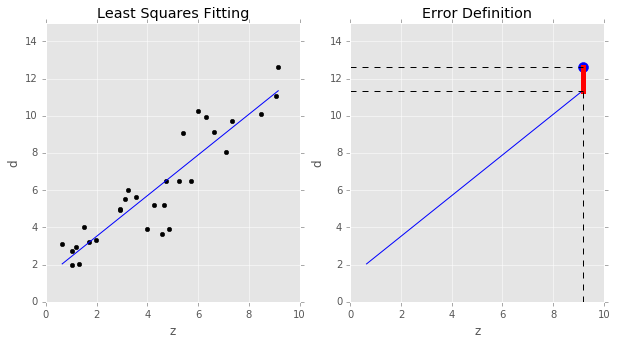

In [48]:
# least squares fit of synthetic data

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

#N = 30
#zmin = 0
#zmax = 10
z = np.sort(np.random.uniform(0, 10, 30))

# d = a + b*z + noise
a = 2.0
b = 1.0
#sd = 1.0
dobs = a + b * z + np.random.normal(0,1.0,30)

# least squares fit
M = 2
G = np.array([np.ones(30), z])
mest = inv(G.dot(np.transpose(G))).dot(G.reshape(2,30).dot(dobs)).reshape(2,1)

# predicted data & error
dpre = np.transpose(G).dot(mest)
e = dobs - dpre

# maximum error
iemax = abs(e).argmax()
emax = np.max(abs(e))

# build figure
plt.subplots(1,2, figsize=(10,5))

# PLOT 1: Simulated data and least squares solution
plt.subplot(121)

# simulated data
plt.scatter(z, dobs, color="black")

# least squares solution
plt.plot(z, dpre, color="blue")

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Least Squares Fitting')
plt.xlabel('z')
plt.ylabel('d')

# PLOT 2: Least squares solution demonstrating error as difference between observed and predicted datum
plt.subplot(122)

# least squares solution
plt.plot(z, dpre, color="blue")

# annotating lines
plt.plot([z[iemax], z[iemax]], [dpre[iemax], dobs[iemax]], color="red", lw=5)
plt.plot([z[iemax], z[iemax]], [0,dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dpre[iemax], dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dobs[iemax], dobs[iemax]], color="black", ls='dashed')
plt.scatter([z[iemax]], [dobs[iemax]], color="blue", s=100)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Error Definition')
plt.xlabel('z')
plt.ylabel('d')